# Jordan Colledge 36628576

## Research question/interests

Briefly describe your research question or interests here.

---

Was the "home team advantage" reflected during the 2021-22 NHL season? (i.e. Was the home team more likely to win than the away team?)
Did teams score more goals when they were at home compared to when they were away?
Does a visiting team's distance from their home arena have any effect on their performance?

In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [195]:
df_raw = pd.read_csv("../data/raw/nhl_elo_2022.csv")
df = pd.read_csv("../data/raw/nhl_elo_2022.csv") # create a separate reference for later manipulation
df

,season,date,playoff,neutral,status,ot,home_team,away_team,home_team_abbr,away_team_abbr,...,overtime_prob,home_team_expected_points,away_team_expected_points,home_team_score,away_team_score,home_team_postgame_rating,away_team_postgame_rating,game_quality_rating,game_importance_rating,game_overall_rating
0,2022,2021-10-12,0,0,post,NaN,Tampa Bay Lightning,Pittsburgh Penguins,TBL,PIT,...,0.230501,1.311921,0.918273,2,6,1561.096238,1545.711971,95,35,65
1,2022,2021-10-12,0,0,post,NaN,Vegas Golden Knights,Seattle Kraken,VEG,SEA,...,0.223453,1.408418,0.815100,4,3,1561.989596,1488.285485,72,37,54
2,2022,2021-10-13,0,0,post,NaN,Toronto Maple Leafs,Montreal Canadiens,TOR,MTL,...,0.230758,1.308496,0.922343,2,1,1532.563546,1501.851125,63,67,65
3,2022,2021-10-13,0,0,post,NaN,Washington Capitals,New York Rangers,WSH,NYR,...,0.231828,1.293629,0.938377,5,1,1535.936730,1507.136428,68,80,74
4,2022,2021-10-13,0,0,post,NaN,Colorado Avalanche,Chicago Blackhawks,COL,CHI,...,0.221429,1.435292,0.786233,4,2,1567.566728,1480.104248,70,30,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1396,2022,2022-06-18,1,0,post,NaN,Colorado Avalanche,Tampa Bay Lightning,COL,TBL,...,0.227190,1.357772,0.869417,7,0,1633.950631,1596.618631,100,100,100
1397,2022,2022-06-20,1,0,post,NaN,Tampa Bay Lightning,Colorado Avalanche,TBL,COL,...,0.241300,1.160700,1.080600,6,2,1601.539044,1629.030218,100,100,100
1398,2022,2022-06-22,1,0,post,OT,Tampa Bay Lightning,Colorado Avalanche,TBL,COL,...,0.239157,1.190721,1.048435,2,3,1598.893234,1631.676028,100,100,100
1399,2022,2022-06-24,1,0,post,NaN,Colorado Avalanche,Tampa Bay Lightning,COL,TBL,...,0.226313,1.369747,0.856566,2,3,1628.397582,1602.171680,100,100,100


# Milestone 3 Task 1

<AxesSubplot:>

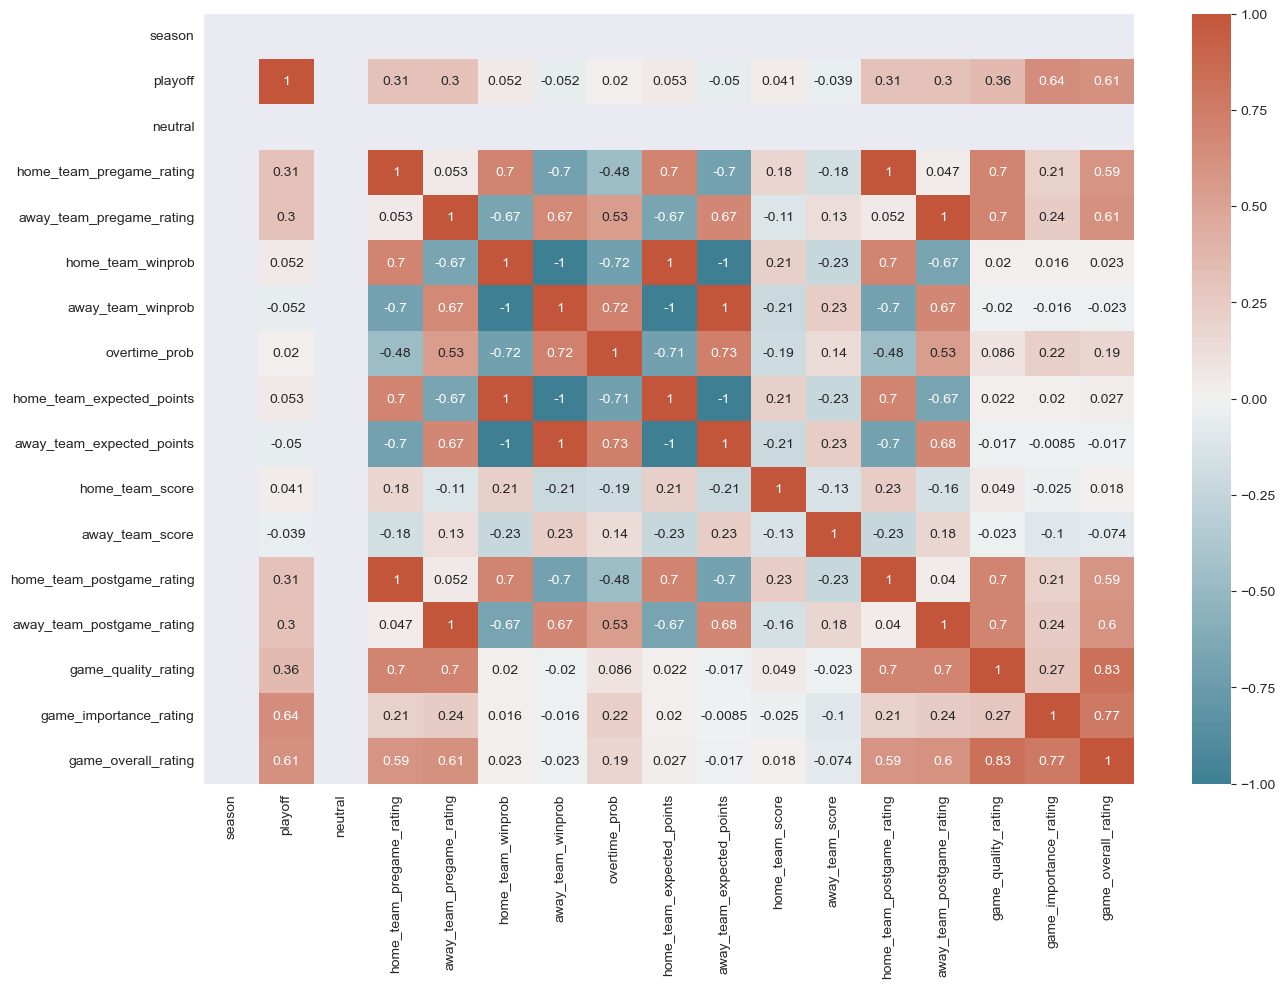

In [196]:
# Displaying all correlations
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

## The above heatmap shows correlations between the different columns.
The most notable correlations here are the ones created as an artifact of how FiveThirtyEight created their columns. Clearly, the data needs to be cleaned up.
Notably, the data includes playoff games, which I will not be working with to remove a possible variable.
Since I will not be working with the team and game ratings, I can remove those columns.
However, I'll work on that later, in the analysis pipeline.

What I will do now, however, since I'll be working with the distance between teams, is add these distances to the table.

In [197]:
# importing distance data

df_distances = pd.read_csv("../data/raw/nhl_distances.csv")
df_distances

,Unnamed: 0,Anaheim Ducks,Arizona Coyotes,Boston Bruins,Buffalo Sabres,Calgary Flames,Carolina Hurricanes,Chicago Blackhawks,Colorado Avalanche,Columbus Blue Jackets,...,Pittsburgh Penguins,San Jose Sharks,Seattle Kraken,St Louis Blues,Tampa Bay Lightning,Toronto Maple Leafs,Vancouver Canucks,Vegas Golden Knights,Washington Capitals,Winnipeg Jets
0,Anaheim Ducks,NaN,612.86,4233.66,3594.23,1955.31,3647.26,2852.43,1398.51,3239.99,...,3496.33,477.91,1563.35,2616.32,3518.22,3558.82,1755.15,582.02,3757.68,2519.75
1,Arizona Coyotes,612.86,NaN,3704.53,3072.68,1951.97,3062.76,2331.11,946.27,2689.49,...,2949.50,969.59,1780.08,2055.98,2905.37,3046.59,1966.14,572.19,3196.82,2200.88
2,Boston Bruins,4233.66,3704.53,NaN,641.64,3363.94,983.85,1381.23,2842.04,1033.70,...,774.34,4311.10,4000.79,1667.04,1905.03,690.73,4023.05,3732.53,633.43,2163.07
3,Buffalo Sabres,3594.23,3072.68,641.64,NaN,2788.75,786.45,742.89,2200.91,472.07,...,286.16,3670.10,3398.68,1063.39,1691.27,94.64,3433.89,3090.89,468.87,1597.79
4,Calgary Flames,1955.31,1951.97,3363.94,2788.75,NaN,3272.73,2235.78,1437.85,2687.10,...,2861.39,1645.16,710.82,2315.42,3683.25,2710.22,673.71,1441.02,3167.49,1200.88
5,Carolina Hurricanes,3647.26,3062.76,983.85,786.45,3272.73,NaN,1037.24,2342.70,596.44,...,527.28,3826.12,3794.61,1063.14,942.12,873.57,3865.86,3228.79,375.51,2158.71
6,Chicago Blackhawks,2852.43,2331.11,1381.23,742.89,2235.78,1037.24,NaN,1462.81,457.09,...,674.93,2942.92,2775.82,414.26,1624.48,716.38,2837.55,2357.47,972.34,1144.51
7,Colorado Avalanche,1398.51,946.27,2842.04,2200.91,1437.85,2342.70,1462.81,NaN,1873.33,...,2122.40,1491.28,1641.17,1280.58,2451.28,2162.35,1776.45,898.13,2399.40,1285.59
8,Columbus Blue Jackets,3239.99,2689.49,1033.70,472.07,2687.10,596.44,457.09,1873.33,NaN,...,261.48,3363.57,3232.86,636.79,1338.26,507.10,3294.14,2771.42,527.51,1562.27
9,Dallas Stars,2050.02,1439.29,2493.25,1926.74,2467.03,1692.44,1284.02,1066.12,1468.50,...,1721.23,2331.47,2703.64,881.00,1477.63,1936.12,2842.37,1761.93,1903.73,1901.88


In [198]:
# clean up distances: shorten team names to abbreviations
team_abbr = ["ANA", "ARI", "BOS", "BUF", "CGY", "CAR", "CHI", "COL",
                        "CBJ", "DAL", "DET", "EDM", "FLA", "LAK", "MIN", "MTL",
                        "NSH", "NJD", "NYI", "NYR", "OTT", "PHI", "PIT", "SJS",
                        "SEA", "STL", "TBL", "TOR", "VAN", "VEG", "WSH", "WPG"]
df_distances.columns = ["Home",
                        "ANA", "ARI", "BOS", "BUF", "CGY", "CAR", "CHI", "COL",
                        "CBJ", "DAL", "DET", "EDM", "FLA", "LAK", "MIN", "MTL",
                        "NSH", "NJD", "NYI", "NYR", "OTT", "PHI", "PIT", "SJS",
                        "SEA", "STL", "TBL", "TOR", "VAN", "VEG", "WSH", "WPG"]
df_distances['Home'] = team_abbr
df_distances

,Home,ANA,ARI,BOS,BUF,CGY,CAR,CHI,COL,CBJ,...,PIT,SJS,SEA,STL,TBL,TOR,VAN,VEG,WSH,WPG
0,ANA,NaN,612.86,4233.66,3594.23,1955.31,3647.26,2852.43,1398.51,3239.99,...,3496.33,477.91,1563.35,2616.32,3518.22,3558.82,1755.15,582.02,3757.68,2519.75
1,ARI,612.86,NaN,3704.53,3072.68,1951.97,3062.76,2331.11,946.27,2689.49,...,2949.50,969.59,1780.08,2055.98,2905.37,3046.59,1966.14,572.19,3196.82,2200.88
2,BOS,4233.66,3704.53,NaN,641.64,3363.94,983.85,1381.23,2842.04,1033.70,...,774.34,4311.10,4000.79,1667.04,1905.03,690.73,4023.05,3732.53,633.43,2163.07
3,BUF,3594.23,3072.68,641.64,NaN,2788.75,786.45,742.89,2200.91,472.07,...,286.16,3670.10,3398.68,1063.39,1691.27,94.64,3433.89,3090.89,468.87,1597.79
4,CGY,1955.31,1951.97,3363.94,2788.75,NaN,3272.73,2235.78,1437.85,2687.10,...,2861.39,1645.16,710.82,2315.42,3683.25,2710.22,673.71,1441.02,3167.49,1200.88
5,CAR,3647.26,3062.76,983.85,786.45,3272.73,NaN,1037.24,2342.70,596.44,...,527.28,3826.12,3794.61,1063.14,942.12,873.57,3865.86,3228.79,375.51,2158.71
6,CHI,2852.43,2331.11,1381.23,742.89,2235.78,1037.24,NaN,1462.81,457.09,...,674.93,2942.92,2775.82,414.26,1624.48,716.38,2837.55,2357.47,972.34,1144.51
7,COL,1398.51,946.27,2842.04,2200.91,1437.85,2342.70,1462.81,NaN,1873.33,...,2122.40,1491.28,1641.17,1280.58,2451.28,2162.35,1776.45,898.13,2399.40,1285.59
8,CBJ,3239.99,2689.49,1033.70,472.07,2687.10,596.44,457.09,1873.33,NaN,...,261.48,3363.57,3232.86,636.79,1338.26,507.10,3294.14,2771.42,527.51,1562.27
9,DAL,2050.02,1439.29,2493.25,1926.74,2467.03,1692.44,1284.02,1066.12,1468.50,...,1721.23,2331.47,2703.64,881.00,1477.63,1936.12,2842.37,1761.93,1903.73,1901.88


In [199]:
# add distances to df
home = list(df['home_team_abbr'])
away = list(df['away_team_abbr'])
dists = []
for i in range(len(home)):
    # this is ugly.
    # basically, it's my terrible way of getting the distance between the two cities.
    # if this were in Excel, I'd use a VLOOKUP, but we don't have that here.
    # so this will have to do, unoptimized though it is.
    dist = list(df_distances.loc[df_distances["Home"]==home[i]][away[i]])[0]
    dists.append(dist)
    
df.insert(len(df.columns),"distance",tuple(dists),True)
df

,season,date,playoff,neutral,status,ot,home_team,away_team,home_team_abbr,away_team_abbr,...,home_team_expected_points,away_team_expected_points,home_team_score,away_team_score,home_team_postgame_rating,away_team_postgame_rating,game_quality_rating,game_importance_rating,game_overall_rating,distance
0,2022,2021-10-12,0,0,post,NaN,Tampa Bay Lightning,Pittsburgh Penguins,TBL,PIT,...,1.311921,0.918273,2,6,1561.096238,1545.711971,95,35,65,1407.74
1,2022,2021-10-12,0,0,post,NaN,Vegas Golden Knights,Seattle Kraken,VEG,SEA,...,1.408418,0.815100,4,3,1561.989596,1488.285485,72,37,54,1208.06
2,2022,2021-10-13,0,0,post,NaN,Toronto Maple Leafs,Montreal Canadiens,TOR,MTL,...,1.308496,0.922343,2,1,1532.563546,1501.851125,63,67,65,781.41
3,2022,2021-10-13,0,0,post,NaN,Washington Capitals,New York Rangers,WSH,NYR,...,1.293629,0.938377,5,1,1535.936730,1507.136428,68,80,74,330.53
4,2022,2021-10-13,0,0,post,NaN,Colorado Avalanche,Chicago Blackhawks,COL,CHI,...,1.435292,0.786233,4,2,1567.566728,1480.104248,70,30,50,1462.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1396,2022,2022-06-18,1,0,post,NaN,Colorado Avalanche,Tampa Bay Lightning,COL,TBL,...,1.357772,0.869417,7,0,1633.950631,1596.618631,100,100,100,2451.28
1397,2022,2022-06-20,1,0,post,NaN,Tampa Bay Lightning,Colorado Avalanche,TBL,COL,...,1.160700,1.080600,6,2,1601.539044,1629.030218,100,100,100,2451.28
1398,2022,2022-06-22,1,0,post,OT,Tampa Bay Lightning,Colorado Avalanche,TBL,COL,...,1.190721,1.048435,2,3,1598.893234,1631.676028,100,100,100,2451.28
1399,2022,2022-06-24,1,0,post,NaN,Colorado Avalanche,Tampa Bay Lightning,COL,TBL,...,1.369747,0.856566,2,3,1628.397582,1602.171680,100,100,100,2451.28


<AxesSubplot:>

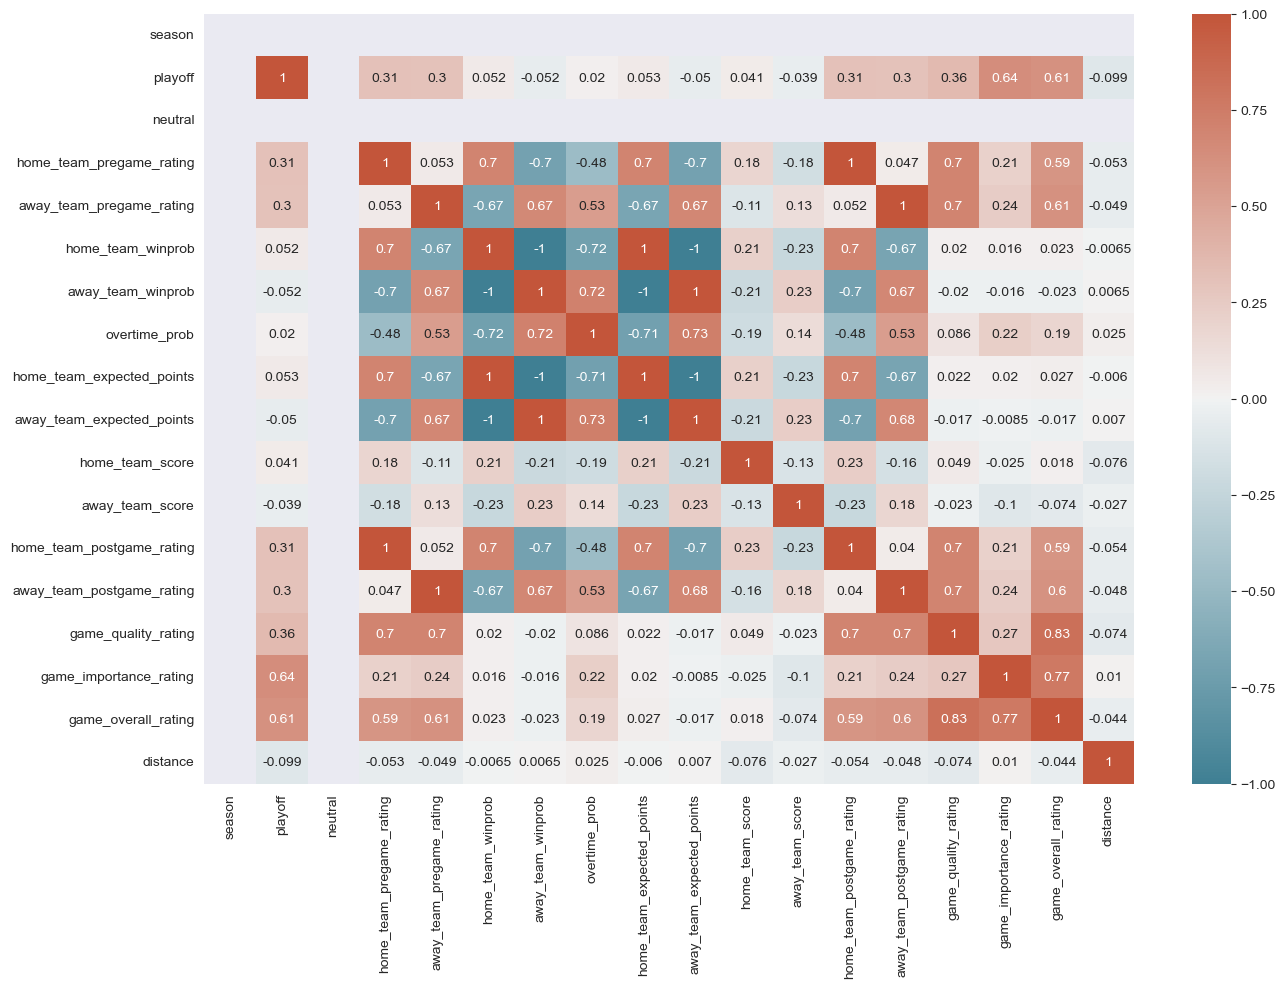

In [202]:
# Displaying all correlations
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

# The above heatmap now contains the correlations for distance.

All of the correlations are very small; the largest among them (aside from distance with itself) is with the "playoff" variable, with a correlation of approximately -0.1. Unfortunately, that correlation won't matter as I'll be filtering out playoff games.

Distances between 15.07 and 4469.18


<AxesSubplot:xlabel='distance', ylabel='away_team_score'>

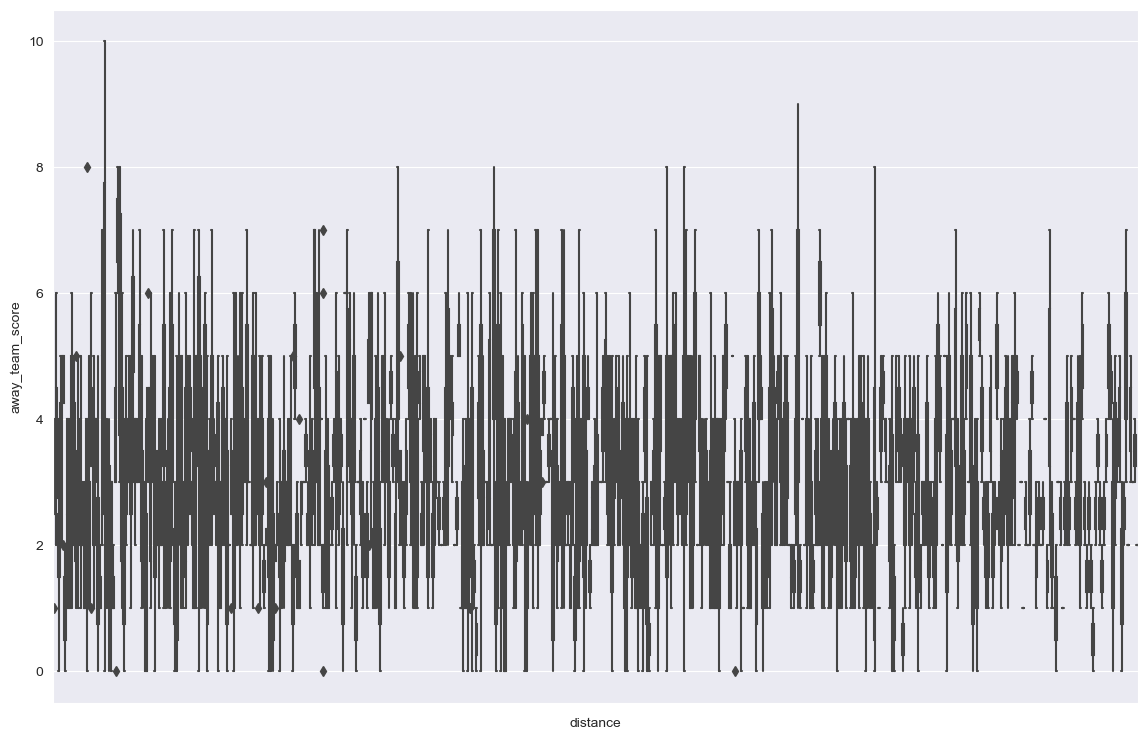

In [219]:
plt.figure(figsize=(14,9))
sns.set_style('darkgrid')
boxplot_away = sns.boxplot(x='distance',y='away_team_score',data=df, orient="v")
max_dist = max(df["distance"])
min_dist = min(df["distance"])
print("Distances between " + str(min_dist) + " and " + str(max_dist))
boxplot_away.set(xticklabels=[])
boxplot_away

# The box plot above shows the correlation between distance and the away team's score.

The x-axis labels were extremely cluttered, so they've been removed.